<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

# Model Evaluation

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

In the homework notebook, we carried out the basic workflow of machine learning model building: 
1) Load data
2) Prepare data for training with train-test splitting
3) Choose hyperparameters and build a model  
  
But how do we know if the model that was built is a "good" model? How can we compare different models and see which ones are better?
  
This is the job of "model evaluation", which we will discuss in this notebook  

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

This notebook is intended to complement the lecture, so you will run code that we have already generated.  
  
We suggest that you work carefully through this notebook, running the code and reading the information along the way
  
You will have a chance to write this code for yourself in the next homework exercise
  

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## 1) Building a Model

First, we need to build an algorithm which we will evaluate. We follow the same steps as in the homework exercise: building a random forest algorithm to predict HPV-status from RNA-seq data of head and neck squamous cell carcinoma.  
  
We will also build another model, called a **decision tree**. A random forest is a ensemble of decision trees that work together to make a prediction. Therefore, we would expect that a random forest might perform better than a decision tree in actually making predictions. We will test that hypothesis using model evaluation

First, we import all of the modules that we are going to need for our code

In [1]:
# importing numpy, pandas, code for train_test_splitting, RandomForestClassifier and DecisionTreeClassifier

import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # importing a decision tree model as well as the random forest to test

In [2]:
# importing matplotlib.pyplot for visualising results 

import matplotlib.pyplot as plt 

# this line makes it so that our matplotlib plots are more visually appealing. It is based on the R ggplot library
plt.style.use("ggplot")

In [3]:
# importing functions from scipy for model evaluation: we will explain these later

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

Next, we read in our data and train-test split it

In [4]:
df = pd.read_csv("../session_1/dataset/hnsc_dataset_scaled.csv")

In [5]:
X = df.drop(["HPV_Status", "Patient ID"], axis = 1)
y = df["HPV_Status"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Now, we build random forest and decision tree models  
  
By having both, we can compare how well they perform at predicting the HPV-status of patients. 
  
We train them on the same dataset, because we want them to perform the same task

In [7]:
rf_model = RandomForestClassifier(random_state = 42,
                                n_estimators = 100, 
                                max_depth = 100)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, random_state=42)

In [8]:
dt_model = DecisionTreeClassifier(random_state = 42, 
                                max_depth = 10)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## 2) Making model predictions  
  
This is where the homework task ended. We now have built two machine learning models: a random forest classifier and a decision tree classifier.  
  
We would like to be able to compare how well these models perform at the task that we are interested in: predicting a patient's HPV status based on mRNA-seq data from their cancer.  
  
For this, we need to do two steps: 
1) Make predictions using the model 
2) Quantify "how good" those predictions are to get **metrics** that define our model's performance  
  
Calculating these **metrics** in an unbiased way allows us to compare different models and algorithms, and is the goal of *model evaluation*.

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

To predict outcomes for new samples, we call the `model.predict(X_test)` method of the model. 
  
The cell below shows how this works.  
  
We now use the testing set to evaluate the model. We want to see how the model will perform on samples that it has not seen before, to get an unbiased estimate of its performance. This is *why* we did the train-test splitting earlier.  


In [9]:
# predictions from the random forest model 

y_pred_rf = rf_model.predict(X_test)

# predictions from the decision tree model 

y_pred_dt = dt_model.predict(X_test)

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

Looking at what these predictions look like, you can see that the model has now guessed for each of the samples in the testing set `X_test`, whether the patient was `Positive` or `Negative` for HPV

In [10]:
y_pred_rf

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positi

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

We also are interested in how "confident" the model is in its predictions. 
  
Machine learning models are statistical. This means that they do not just predict whether a patient is "HPV-Positive" or "HPV-Negative", they actually predict the probability that the patient is "Positive" or "Negative", given their mRNA-seq data.  
  
When the model is making its predictions, it then compares the probability of the patient being each class to a threshold, and makes the classification based on that.  
  
For example, for a particular patient, the model might predict a 70% chance that the patient is HPV-positive and a 30% chance that the patient is HPV-negative. In this case, the model would label that patient `"Positive"` when we call `model.predict()`. If a patient had a 51% chance of being HPV-positive and a 49% chance of being HPV-negative, then we would still call that patient `"Positive"` even though it is very close.  
  
If a model predicts that a lot of patients are "Positive", but all with probabilities close to 0.5, this indicates the model is not that reliable and we should be more wary of its predictions than a model that predicts nearly everything with a probability close to 1.0.   
  
For any model, we get the prediction probabilities with `model.predict_proba(X_test)`

In [11]:
y_proba_rf = rf_model.predict_proba(X_test)
y_proba_dt = dt_model.predict_proba(X_test)

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

If we view the prediction probabilities, we see there are two columns. This is because there are two classes: "HPV-positive" and "HPV-negative".  
  
Because a patient is always one of these two; for each row, the values in the columns add up to 1.  
  
We only actually need to take one of these columns, since they always add up to 1. Therefore, we just take the second column, which gives us the probability that the patient is "HPV-positive"

In [12]:
y_proba_rf

array([[0.06, 0.94],
       [0.1 , 0.9 ],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.24, 0.76],
       [0.09, 0.91],
       [0.04, 0.96],
       [0.02, 0.98],
       [0.09, 0.91],
       [0.07, 0.93],
       [0.01, 0.99],
       [0.08, 0.92],
       [0.8 , 0.2 ],
       [0.04, 0.96],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.35, 0.65],
       [0.87, 0.13],
       [0.  , 1.  ],
       [0.06, 0.94],
       [0.05, 0.95],
       [0.8 , 0.2 ],
       [0.05, 0.95],
       [0.07, 0.93],
       [0.  , 1.  ],
       [0.11, 0.89],
       [0.02, 0.98],
       [0.12, 0.88],
       [0.  , 1.  ],
       [0.12, 0.88],
       [0.73, 0.27],
       [0.01, 0.99],
       [0.05, 0.95],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.4 , 0.6 ],
       [0.14, 0.86],
       [0.08, 0.92],
       [0.06, 0.94],
       [0.01, 0.99],
       [0.62, 0.38],
       [0.  , 1.  ],
       [0.88, 0.12],
       [0.06,

In [13]:
# for each row, just take the first column 
y_proba_rf = rf_model.predict_proba(X_test)[:,1] # the square brackets [] here mean take the second column ([:,0] would be the first column)
y_proba_dt = dt_model.predict_proba(X_test)[:,1]

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## 3) Evaluating Model Predictions

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

Now that we have made predictions, we can evaluate how good those predictions are. By summarising this in different metrics, we can get a picture for what the "better" model actually is.  
  
We do this by comparing our predictions from the model (`y_pred_rf`, `y_pred_dt`) to the true classifications (`y_test`).  
  
We are going to discuss a few different ways of evaluating a model. It is usually good to use multiple measurements to get a complete picture of a model's strengths and weaknesses.

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

### <u> Accuracy </u>  
  
This is a simple, easy to understand metric.  
It is equal to the ratio of number of samples where the classification was correct to the total number of samples: 
$$
\mathrm{Accuracy} = \dfrac{\textrm{Number of samples where the classification was correct}}{\textrm{Total number of samples}}
$$  
  
This means that an accuracy of 1.0 means that every single sample was classified correctly and 0.0 means that every single sample was classified incorrectly. A strange fact is that if a model had an accuracy of 0.0, this would mean that it is *still* a perfect model, because we could always just flip the final prediction it gave and get the right answer 100% of the time. A classifier is "bad" if it is no better than random chance, so this would be an accuracy of 0.5. In this case, the model is just no better than a coin flip for every case.
  
Accuracy is an easy metric to calculate and understand, but it can be misleading.  
  
If one of the classes that you are predicting is rare, then the accuracy will be a biased estimate. If only 10% of samples are really "HPV-negative", then even if the model gets all of these wrong, the accuracy will (at worst) be lowered by only 10%. But if the model always gets the "HPV-negative" status wrong, then it just isn't a very good model.  
  
The cell below calculates and prints the accuracy for each of our models

In [14]:
accuracy_rf = accuracy_score(y_test, y_pred_rf) # the first argument in the function should be the true values and the second should be the predictions 
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [15]:
print("Random Forest Accuracy = ", accuracy_rf)

Random Forest Accuracy =  0.9795918367346939


In [16]:
print("Decision Tree Accuracy = ", accuracy_dt)

Decision Tree Accuracy =  0.9387755102040817


<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

Both models are pretty decent, with accuracies above 90%!  
  
However, the random forest model has a higher accuracy. This means that it is classifying *more samples* correctly, so appears to be a better model.  
  
As we said above though, it is important to use multiple metrics to get an overall picture

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

### <u> F1-Score </u>
  
This is a more complicated metric. It is a harmonic average of the model's **precision** and **recall**.  


<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

**Precision** is also called **positive predictive value**. It is the fraction of times that the model predicted a patient is "HPV-postive", when the patient was in fact "HPV-positive", compared to the total number of "HPV-positive" predictions. 
$$
\mathrm{Precision} = \dfrac{TP}{TP + FP}
$$
* TP is the number of true positives
* FP is the number of false positives
  
  

  
**Recall** is also known as **sensitivity** or **true positive rate**. It is defined as: 
$$
\mathrm{Recall} = \dfrac{TP}{TP + FN}
$$
* TP is the number of true positives
* FN is the number of false negatives

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

The **f1-score** is a balance of these. It is defined as: 
$$
\mathrm{F1} = \dfrac{2}{\dfrac{1}{\mathrm{Recall}} + \dfrac{1}{\mathrm{Precision}}}
$$  
  
This complicated formula means that the **f1-score** balances these two quantities. If a model is bad at picking out positive samples (because it is not sensitive enough), then its **precision** and also **f1-score** will be low. If a model is instead too sensitive, then its **recall** will be low and its **f1-score** will also be low.  
  
**f1-score** is the preferred metric for many applications because it balances true positives, false positives and false negatives well.  
  
A *perfect* model would have an f1-score of 1.0, and a *useless* model would have an f1-score of 0.0. This is not like accuracy where 0.5 is the "worst case". The lower the f1-score, the worse the model. 
  
Below, we show how to calculate the f1-score for the different models 

In [17]:
f1_rf = f1_score(y_test, y_pred_rf, pos_label = "Positive") # the first argument in the function should be the true values and the second should be the predictions 
f1_dt = f1_score(y_test, y_pred_dt, pos_label = "Positive")

# the pos_label argument here should be the name of the positive class in the dataset, here ours is "Positive". 

In [18]:
print("Random Forest F1-Score = ", f1_rf)

Random Forest F1-Score =  0.9883720930232558


In [19]:
print("Decision Tree F1-Score = ", f1_dt)

Decision Tree F1-Score =  0.9642857142857143


<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

Again, the decision tree is a worse model than the random forest. However, both models are pretty good in terms of their overall performance!

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

### <u> Reporter Operating Characteristic </u>

A **Receiver Operating Characteristic (ROC) curve** is a graphical tool used to evaluate the performance of a binary classification model — like our HPV classifier.

#### <u> How It's Calculated </u>

To create the ROC curve:

1. The model predicts **probabilities** (e.g., the likelihood that a sample is HPV-positive).
2. A series of thresholds (e.g. 0.1, 0.2, ..., 0.9) are applied to turn these probabilities into binary decisions.
3. For each threshold, we compute:
   - **True Positive Rate (TPR)**: proportion of actual positives correctly identified  
     TPR = Sensitivity = TP / (TP + FN)
   - **False Positive Rate (FPR)**: proportion of actual negatives incorrectly labeled as positive  
     FPR = 1 - Specificity = FP / (FP + TN)
4. These (FPR, TPR) pairs are plotted to create the curve.

#### <u> How to Interpret It </u>

- A **perfect model** reaches the top-left corner: TPR = 1, FPR = 0.
- A **random model** lies along the diagonal line (45° line).
- The **Area Under the ROC Curve (AUC)** summarizes performance:
  - **AUC = 1.0**: perfect classifier
  - **AUC = 0.5**: no better than chance
  - **AUC > 0.8**: generally considered good

#### <u> Clinical Insight </u>

In medical contexts:
- A higher TPR means fewer false negatives (missed cases), which is important in **screening**.
- A lower FPR means fewer false positives, reducing unnecessary worry or treatment.

The ROC curve helps us **visualize the trade-off** between sensitivity and specificity at different decision thresholds.

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

The cell below shows the process of how we calculate the "true positive rates", the "false positive rates" and the "thresholds" for each model.  
  
We also calculate the "area under the curve", letting us compare the models more effectively

In [20]:
false_positive_rate_rf, true_positive_rate_rf, thres_rf = roc_curve(y_test, y_proba_rf, pos_label = "Positive")
auc_rf = roc_auc_score(y_test, y_proba_rf)

false_positive_rate_dt, true_positive_rate_dt, thres_dt = roc_curve(y_test, y_proba_dt, pos_label = "Positive")
auc_dt = roc_auc_score(y_test, y_proba_dt)

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

We then use `matplotlib` to plot these so we can visualise how our classifier is performing.

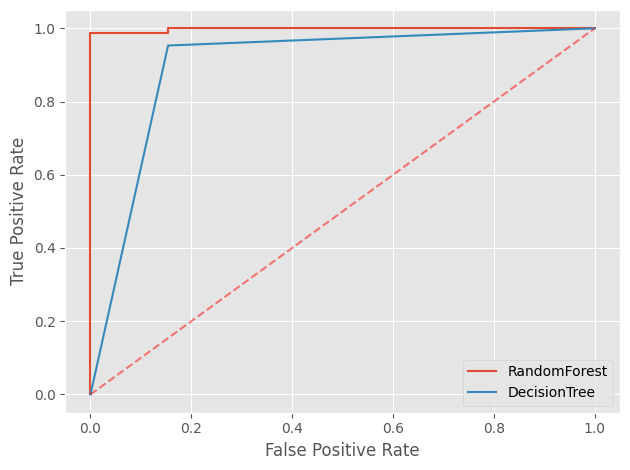

In [21]:
fig, ax = plt.subplots()

# plot the ROC curve for the random forest
ax.plot(false_positive_rate_rf, true_positive_rate_rf, label = "RandomForest")

# plot the ROC curve for the decision tree
ax.plot(false_positive_rate_dt, true_positive_rate_dt, label = "DecisionTree")

# plot the ROC curve that a coinflip would have
ax.plot([0,1], [0,1], color = 'red', alpha = 0.5, linestyle = '--')

# set x and y labels 
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

# add the legend to the plot 
ax.legend()

fig.tight_layout()

plt.show()

In [22]:
print("Area under ROC (Random Forest) = ", auc_rf)
print("Area under ROC (Decision Tree) = ", auc_dt)

Area under ROC (Random Forest) =  0.9981900452488688
Area under ROC (Decision Tree) =  0.8995475113122171


<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

Let us summarise our comparison between the models: 

| Metric          | Decision Tree | Random Forest |
|-----------------|----------------|----------------|
| **Accuracy**    | 0.94           | 0.98           |
| **F1-score**    | 0.96           | 0.99           |
| **ROC-AUC**     | 0.90           | 0.998          |

###  Interpretation

- The **Random Forest outperformed the Decision Tree** across all metrics.
- The **accuracy** of the Random Forest is higher, indicating it makes fewer overall classification errors.
- The **F1-score**, which balances precision and recall, is also higher for the Random Forest, suggesting it performs well even if the classes are imbalanced.
- The **ROC-AUC** score of 0.998 for the Random Forest indicates **near-perfect discrimination** between HPV-positive and HPV-negative cases. In contrast, the Decision Tree's ROC-AUC of 0.90, while still strong, suggests it is more prone to errors at different decision thresholds.

### Conclusion

The Random Forest appears to be the more robust and generalizable model for this classification task. Its ensemble nature — combining many trees — allows it to capture complex patterns in the data while reducing the risk of overfitting. For clinical applications where accurate HPV classification is crucial, the Random Forest would be the preferred model based on these results.

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## Next

The next notebook discusses using the SHAP scores framework for biomarker discovery. This can potentially let us build much more effective models, that are much more biologically interpretable.  
  
This is the *critical* step in using machine learning in personalised medicine